In [124]:
#Load General Library
import numpy as np
import matplotlib as mp 
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Load Sklearn libraries
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing   
from sklearn import tree      
from sklearn import svm                                                                                              

In [125]:
#Import data
df = pd.read_excel (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\Code\5.Classification\dataset.xlsx')
target = list(df.columns)[0]
features = list(df.columns)[1:]

x = df.iloc[:, 1:7]
y = df.iloc[:, 0]

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [126]:
weather['Summary'].value_counts()

# Partly Cloudy 1
# Mostly Cloudy 2
# Overcast 3
# Foggy 4
# Clear 5
# Breezy and Partly Cloudy 6

Mostly Cloudy    188
Partly Cloudy    162
Overcast          90
Foggy             33
Clear             27
Name: Summary, dtype: int64

In [127]:
#Data Splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=62)

In [128]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

y_pred_desctree = clf.predict(x_test)

In [129]:
# #Plot Desiciton Tree
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=features,  
#                    class_names=target,
#                    filled=True)

In [130]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_desctree))
print(metrics.confusion_matrix(y_test, y_pred_desctree))
print("\n")
print(metrics.classification_report(y_test, y_pred_desctree))

Accuracy: 0.6466666666666666
[[ 6  0  0  0  3]
 [ 0  9  0  0  0]
 [ 2  0 29  9 17]
 [ 0  1  1 24  4]
 [ 2  0 12  2 29]]


               precision    recall  f1-score   support

        Clear       0.60      0.67      0.63         9
        Foggy       0.90      1.00      0.95         9
Mostly Cloudy       0.69      0.51      0.59        57
     Overcast       0.69      0.80      0.74        30
Partly Cloudy       0.55      0.64      0.59        45

     accuracy                           0.65       150
    macro avg       0.68      0.72      0.70       150
 weighted avg       0.65      0.65      0.64       150



In [131]:
#Support Vector Machine Classification
clf = svm.SVC(kernel="linear",C=1)

clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.5333333333333333
[[ 2  0  0  0  7]
 [ 0  8  0  1  0]
 [ 1  0 32  7 17]
 [ 0  1 12 12  5]
 [ 2  0 15  2 26]]
               precision    recall  f1-score   support

        Clear       0.40      0.22      0.29         9
        Foggy       0.89      0.89      0.89         9
Mostly Cloudy       0.54      0.56      0.55        57
     Overcast       0.55      0.40      0.46        30
Partly Cloudy       0.47      0.58      0.52        45

     accuracy                           0.53       150
    macro avg       0.57      0.53      0.54       150
 weighted avg       0.53      0.53      0.53       150



In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn_score = [ ]

for i in range (1,100):
    clf = KNeighborsClassifier(n_neighbors=i)

    clf.fit(x_train, y_train)

    y_pred_knn = clf.predict(x_test)

    score = metrics.accuracy_score(y_test, y_pred_knn)
    knn_score.append((i+1, score))

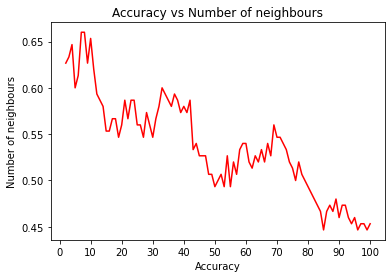

In [134]:
knn_score = np.asarray(knn_score)

fig, ax = plt.subplots()
ax.plot(knn_score[:,0], knn_score[:,1],color='red');
ax.xaxis.set_ticks(np.arange(0, 110, 10))
ax.set(xlabel='Accuracy', ylabel='Number of neighbours', title='Accuracy vs Number of neighbours');

In [135]:
#Best number of neighbours
bestk = np.amax(knn_score,axis=0)
print(bestk)

[100.     0.66]


In [138]:
#Best number of neighbours
clf = KNeighborsClassifier(n_neighbors=7)

clf.fit(x_train, y_train)

y_pred_knn = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.66
[[ 5  0  0  0  4]
 [ 0  7  0  2  0]
 [ 0  0 40  7 10]
 [ 0  0 11 19  0]
 [ 2  1 14  0 28]]
               precision    recall  f1-score   support

        Clear       0.71      0.56      0.63         9
        Foggy       0.88      0.78      0.82         9
Mostly Cloudy       0.62      0.70      0.66        57
     Overcast       0.68      0.63      0.66        30
Partly Cloudy       0.67      0.62      0.64        45

     accuracy                           0.66       150
    macro avg       0.71      0.66      0.68       150
 weighted avg       0.66      0.66      0.66       150

